In [293]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [294]:
original_image = cv2.imread('mollahoseini-karimi.jpg')
original_image = original_image[:,:256]
img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)


In [295]:
vectorized = img.reshape((-1, 3))
vectorized = np.float32(vectorized)


[[  0   0 255]
 [255   0 255]
 [  0 255   0]
 [128   0 128]]


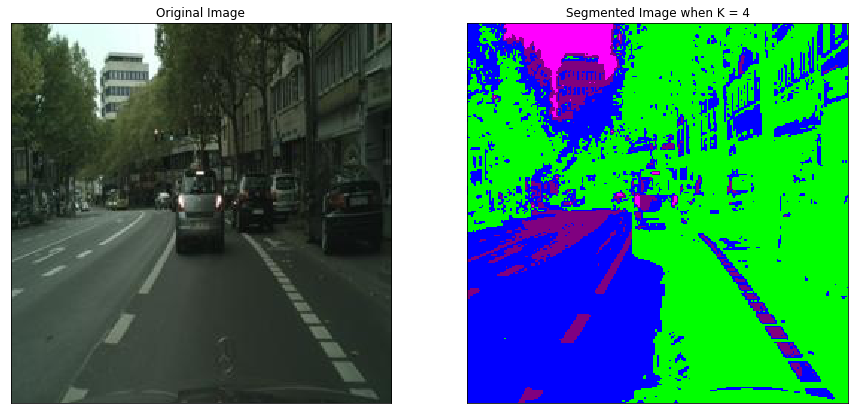

In [296]:
criteria1 = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts1 = 10
figure_size1 = 15
squared_distances1 = []
color = np.array([[0,0,255],[255,0,255],[0,255,0],[128,0,128],[255,0,0],[255,255,0],[0,128,128],[128,128,0],[0,255,255],[0,0,0]])
for K in range(1,10):
    ret1,label1,center1=cv2.kmeans(vectorized,K,None,criteria1,attempts1,cv2.KMEANS_PP_CENTERS)
    squared_distances1.append(ret1)
    center1 = np.uint8(center1)
    center1= color[:K]
    #center = center + 50   
    
    res1 = center1[label1.flatten()]
    result_image1 = res1.reshape((img.shape))
    if K==4:
    
        print(center1)
        plt.figure(figsize=(figure_size1,figure_size1))
        plt.subplot(1,2,1),plt.imshow(img)
        plt.title('Original Image'), plt.xticks([]), plt.yticks([])
        plt.subplot(1,2,2),plt.imshow(result_image1)
        plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
        plt.show()

In [297]:
center1

array([[  0,   0, 255],
       [255,   0, 255],
       [  0, 255,   0],
       [128,   0, 128],
       [255,   0,   0],
       [255, 255,   0],
       [  0, 128, 128],
       [128, 128,   0],
       [  0, 255, 255]])

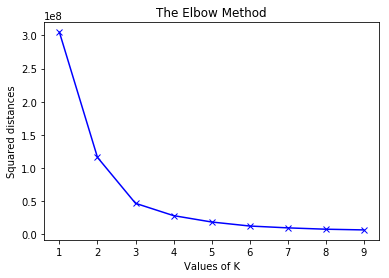

In [298]:
plt.plot(range(1, 10), squared_distances1, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Squared distances')
plt.title('The Elbow Method')
plt.show()

In [299]:
k_final = 4
name = []
vectorized1 = img.reshape((-1, 3))
vectorized1 = np.float32(vectorized1)


In [300]:
criteria2 = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts2 = 10
figure_size1 = 15
color = np.array([[0,0,255],[255,0,255],[0,255,0],[128,0,128],[255,0,0],[255,255,0],[0,128,128],[128,128,0],[0,255,255],[0,0,0]])

ret2,label2,center2=cv2.kmeans(vectorized1,k_final,None,criteria2,attempts2,cv2.KMEANS_PP_CENTERS)

center2 = np.uint8(center2)
center2= color[:k_final]
    #center = center + 50   
    
res2 = center2[label2.flatten()]
result_image2 = res2.reshape((img.shape))

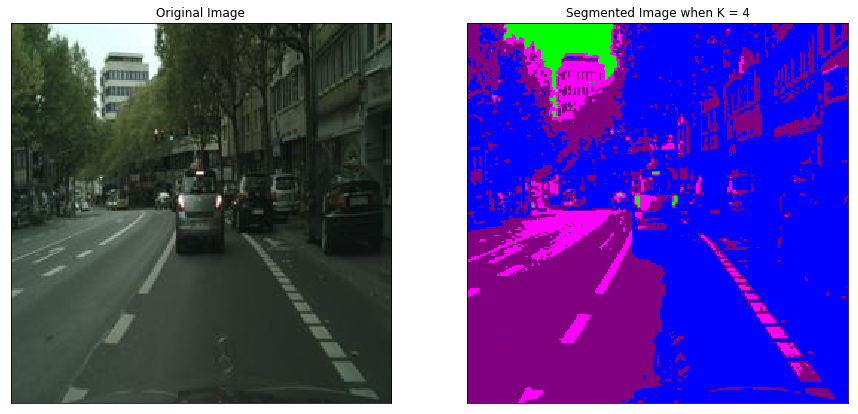

In [301]:
plt.figure(figsize=(figure_size1,figure_size1))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image2)
plt.title('Segmented Image when K = %i' % k_final), plt.xticks([]), plt.yticks([])
plt.show()

In [302]:
label2

array([[3],
       [3],
       [3],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [347]:
final_image = cv2.imread('mk.png')
final_image = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)

In [348]:
final_image_2d = final_image.reshape((-1, 3))
final_image_2d = np.float32(final_image_2d)

In [349]:
len(np.unique(final_image_2d[:,0]))

22

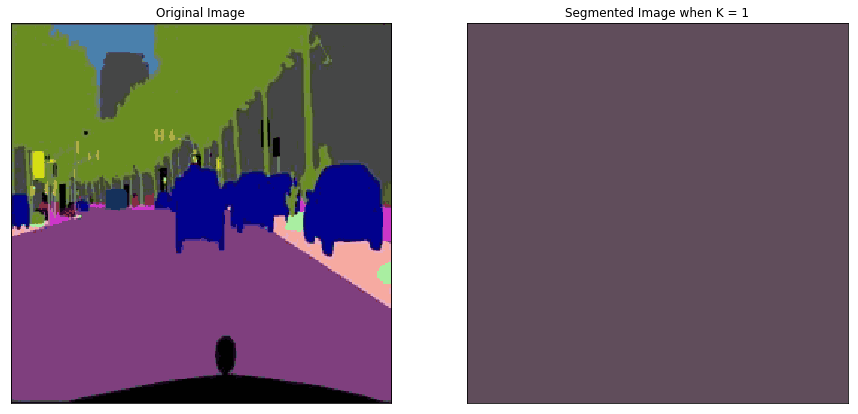

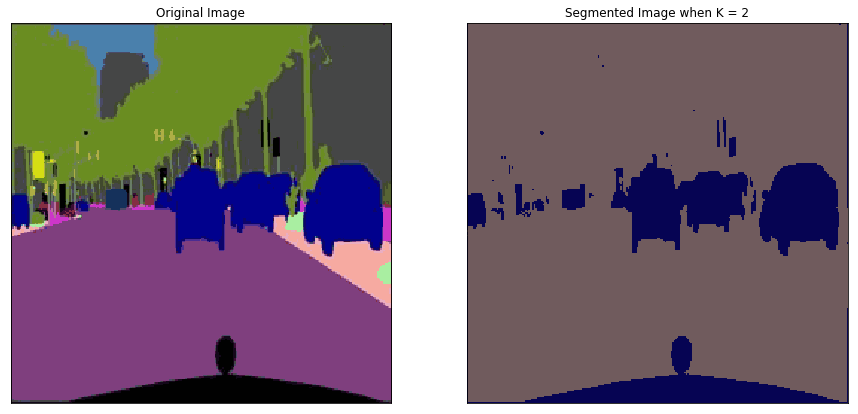

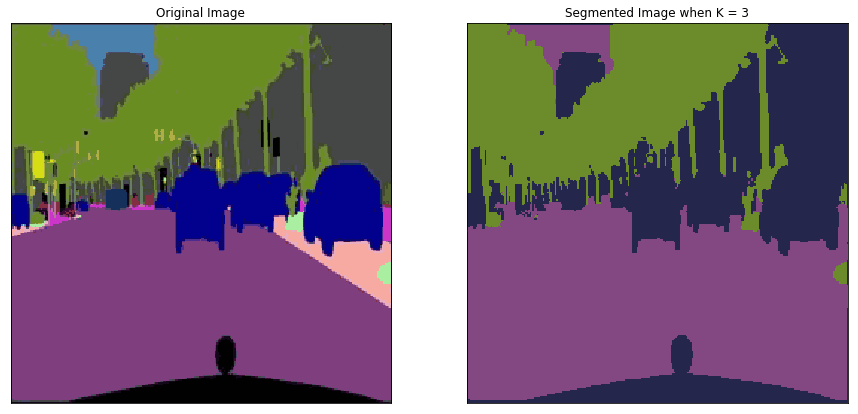

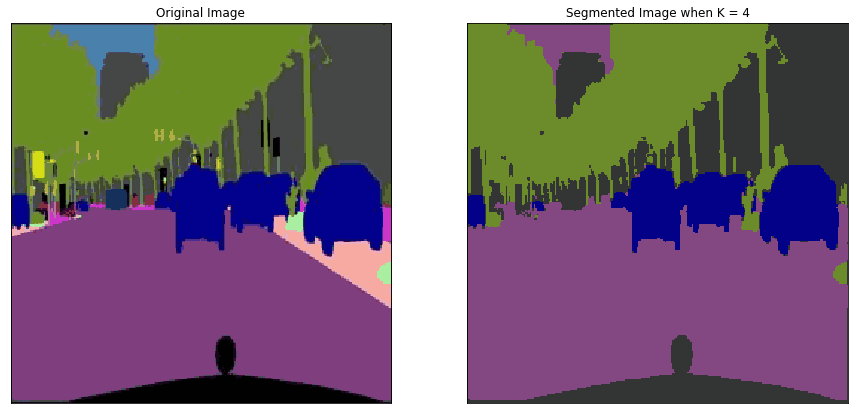

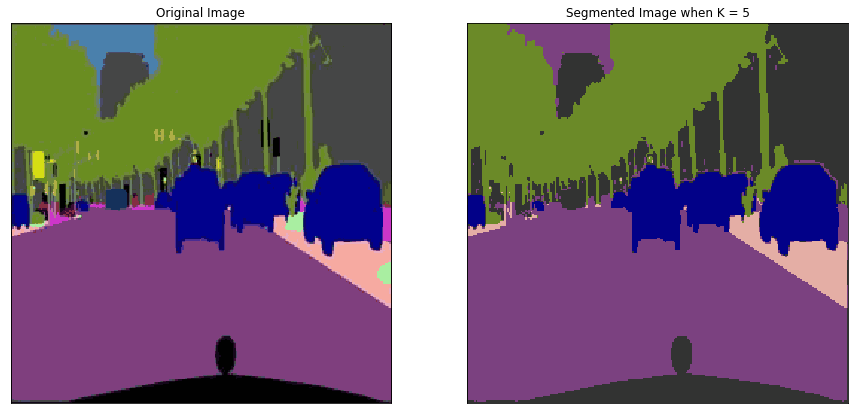

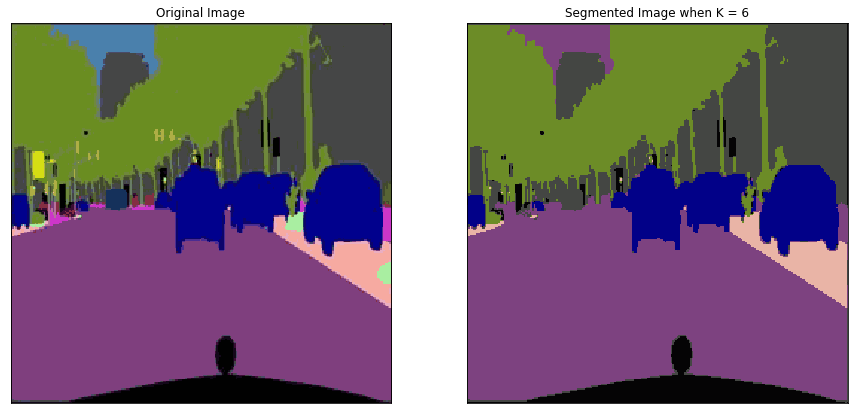

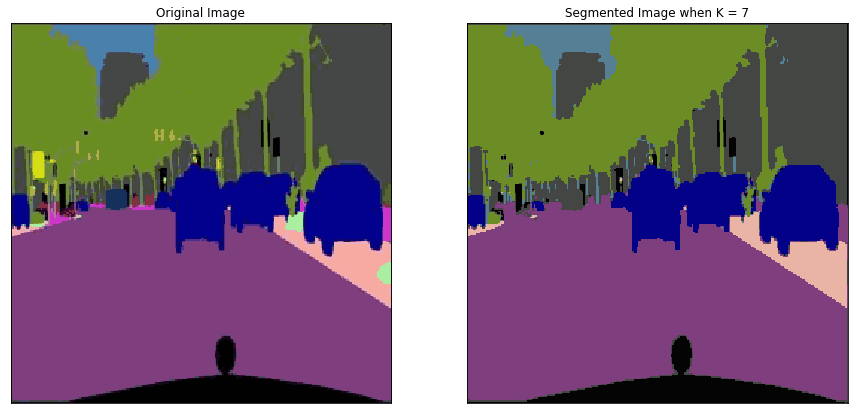

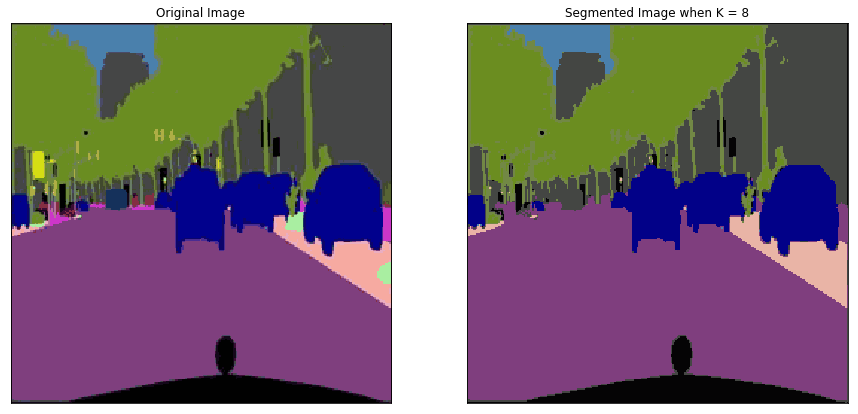

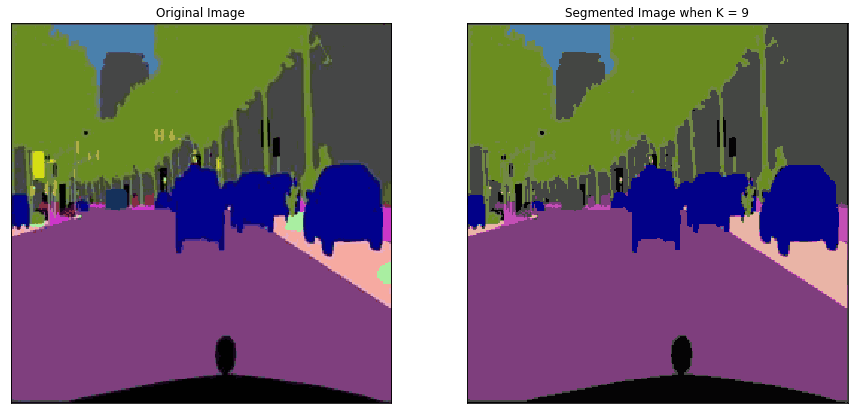

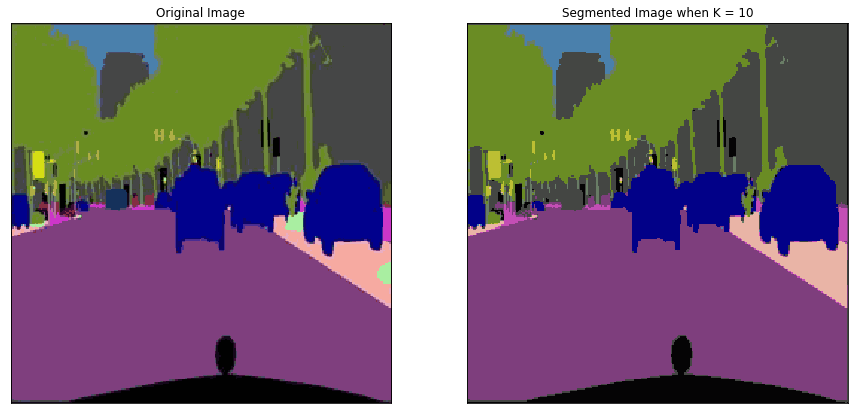

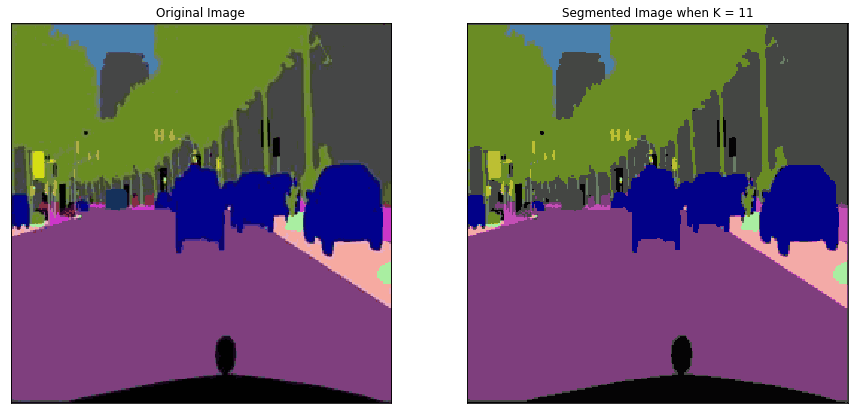

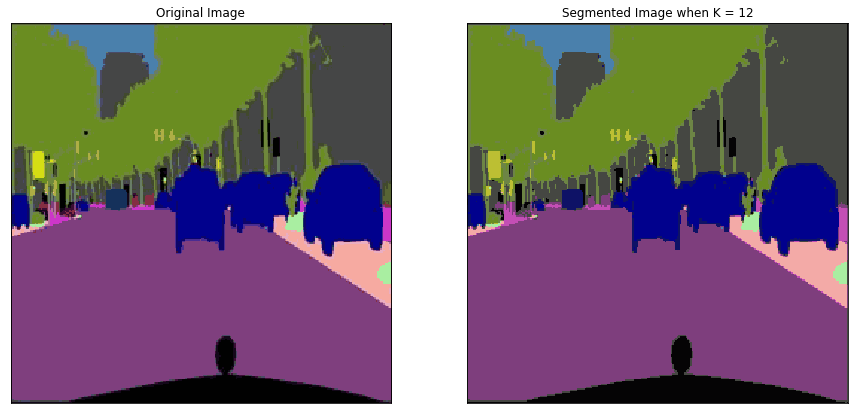

In [412]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10
figure_size = 15
squared_distances = []
for K in range(1, 13):
    ret,label,center=cv2.kmeans(final_image_2d,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    squared_distances.append(ret)
    center = np.uint8(center)
    #center= color[:K]
    #center = center + 50   
    
    res = center[label.flatten()]
    result_image = res.reshape((final_image.shape))
    
    
    
    plt.figure(figsize=(figure_size,figure_size))
    plt.subplot(1,2,1),plt.imshow(final_image)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(result_image)
    plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
    plt.show()

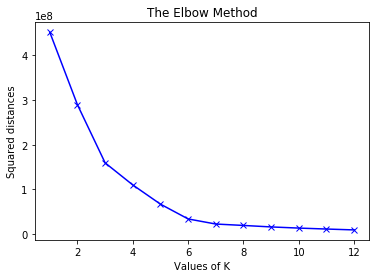

In [413]:
plt.plot(range(1, 13), squared_distances, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Squared distances')
plt.title('The Elbow Method')
plt.show()

In [414]:
k_ground = 12


In [465]:
len(np.unique(label[:,0]))

12

In [463]:
final_label = np.copy(label)
for j in range(len(np.unique(label2[:,0]))):
    arr = []
    
        
    arr = [i*(label2[i]==j) for i in range(1,len(label2))]
    arr = np.unique(arr)
    
    arr = np.delete(arr,0)
    if label2[0]==j:
        arr = np.concatenate((np.array([0]),arr),axis=None)
    print(arr,j)
    #print(arr,j)
    new_label = []
    new_label = np.copy(label[arr])
    max_label =0
    max_no = 0
    for i in range(k_ground):
        if np.count_nonzero(new_label==i) > max_no:
            max_no = np.count_nonzero(new_label==i)
            print(max_no,"....",i)
            max_label = i
   
    final_label[arr]=max_label

[   15    20   106 ... 65533 65534 65535] 0
7379 .... 0
8387 .... 1
9899 .... 3
[   24    25    97 ... 65316 65317 65318] 1
886 .... 0
2213 .... 3
[   26    27    28 ... 31371 31532 31603] 2
130 .... 0
226 .... 6
1252 .... 7
[    0     1     2 ... 65419 65420 65421] 3
3348 .... 0
13425 .... 3


In [476]:
true_guess = (np.count_nonzero((final_label==label)==True))
true_guess

26789

In [478]:
accuracy = 100*((true_guess)/len(label))
accuracy

40.87677001953125